## Concluding remarks and Renku Knowledge Graph

### Review the Project's artifacts

In [1]:
!pwd

/notebooks/nlp-clinical-vignettes/notebooks


In [2]:
%%bash

cd ..

tree -L 1 .

.
├── Dockerfile
├── README.md
├── data
├── environment.yml
├── notebooks
├── requirements.txt
└── src

3 directories, 4 files


In [3]:
%%bash

cd ../src

tree -L 2 .

.
└── py_scripts
    ├── __pycache__
    ├── bner_drugbank.py
    ├── bner_scispacy.py
    ├── consolidate_results.py
    ├── create_result_pdf.py
    ├── drugdrug_interactions_drugbank.py
    ├── entities_in_context.py
    ├── extract_book_pages.py
    └── preprocess_drugbank_vocab.py

2 directories, 8 files


In [4]:
%%bash

cd ../data

tree -L 2 .

.
├── book_clinical_cases
│   └── JMD-Cases-of-Interest.pdf
├── drugbank_vocab
│   └── drugbank_all_drugbank_vocabulary.csv.zip
├── errors
│   └── errors_selection1.json
├── outputs
│   ├── consolidated_bner_selection1.bin
│   ├── drugdrug_interactions_selection1.json
│   ├── medication_bner_selection1.json
│   ├── structured_bner_selection1.bin
│   ├── vignettes_selection1.json
│   ├── vignettes_selection1_bc5cdr.json
│   └── vignettes_selection1_bionlp13cg.json
├── tmp_files
│   ├── drugbank_vocab.json
│   └── pages_selection.txt
└── vignettes_reports
    ├── Report_Page_114.html
    ├── Report_Page_114.pdf
    ├── Report_Page_116.html
    ├── Report_Page_116.pdf
    ├── Report_Page_120.html
    ├── Report_Page_120.pdf
    ├── Report_Page_14.html
    ├── Report_Page_14.pdf
    ├── Report_Page_140.html
    ├── Report_Page_140.pdf
    ├── Report_Page_160.html
    ├── Report_Page_160.pdf
    ├── Report_Page_208.html
    ├── Report_Page_208.pdf
    ├── Report_Page_24.html
    ├── Report_

### Datasets created and used

In [5]:
!renku dataset ls


ID                                    NAME                 TITLE                                                                VERSION
------------------------------------  -------------------  -------------------------------------------------------------------  ---------
6bdd2e04-9c88-4415-9de6-bc7b21e2be33  drugbank_vocab       DrugBank Vocabulary
f71677c9-ea04-48a7-892d-fd8b85fffb73  book_clinical_cases  Interesting Clinical Vignettes: 101 Ice Breakers for Medical Rounds


In [6]:
!renku dataset ls-files


DATASET NAME         ADDED                  SIZE  PATH                                                          LFS
-------------------  -------------------  ------  ------------------------------------------------------------  -----
book_clinical_cases  2021-07-13 08:39:44  1.2 MB  data/book_clinical_cases/JMD-Cases-of-Interest.pdf            *
drugbank_vocab       2021-07-13 08:42:07  773 KB  data/drugbank_vocab/drugbank_all_drugbank_vocabulary.csv.zip  *


In [7]:
!wget  -qO-  "https://renkulab.io/knowledge-graph/projects/ciolac_c/nlp-clinical-vignettes/datasets"   |  python -m json.tool

[
    {
        "_links": [
            {
                "rel": "details",
                "href": "https://renkulab.io/knowledge-graph/datasets/6bdd2e04-9c88-4415-9de6-bc7b21e2be33"
            },
            {
                "rel": "initial-version",
                "href": "https://renkulab.io/knowledge-graph/datasets/567569cb-0545-4d3d-98ad-2e15784d6e80"
            }
        ],
        "derivedFrom": "https://renkulab.io/datasets/567569cb-0545-4d3d-98ad-2e15784d6e80",
        "identifier": "6bdd2e04-9c88-4415-9de6-bc7b21e2be33",
        "versions": {
            "initial": "567569cb-0545-4d3d-98ad-2e15784d6e80"
        },
        "title": "DrugBank Vocabulary",
        "name": "drugbank_vocab",
        "images": []
    },
    {
        "_links": [
            {
                "rel": "details",
                "href": "https://renkulab.io/knowledge-graph/datasets/f71677c9-ea04-48a7-892d-fd8b85fffb73"
            },
            {
                "rel": "initial-version",
        

------------------

## Discoverability


### REST API

Note that at the moment there is no REST API endpoint to search projects by keywords, i.e. we can't yet :
`wget  -qO-  "https://renkulab.io/knowledge-graph/projects?query=clinical"`  

But we can search for datasets with the REST API:


In [8]:
!wget  -qO-  "https://renkulab.io/knowledge-graph/datasets?query=clinical"  |  python -m json.tool

[
    {
        "_links": [
            {
                "rel": "details",
                "href": "https://renkulab.io/knowledge-graph/datasets/f71677c9-ea04-48a7-892d-fd8b85fffb73"
            }
        ],
        "description": "Texas Tech University Health Sciences Center, https://www.ttuhsc.edu/clinical-research/vignettes.aspx",
        "identifier": "f71677c9-ea04-48a7-892d-fd8b85fffb73",
        "title": "Interesting Clinical Vignettes: 101 Ice Breakers for Medical Rounds",
        "name": "book_clinical_cases",
        "published": {
            "creator": [
                {
                    "email": "ciolac_c@yahoo.co.uk",
                    "name": "ciolac_c"
                }
            ]
        },
        "date": "2021-07-13T08:39:44.624658Z",
        "projectsCount": 1,
        "keywords": [
            "clinical cases,clinical vignettes,book,pdf"
        ],
        "images": []
    }
]


**Get more metadata about this dataset of ths project**

In [9]:
!wget  -qO-  "https://renkulab.io/knowledge-graph/datasets/f71677c9-ea04-48a7-892d-fd8b85fffb73"   |  python -m json.tool

{
    "_links": [
        {
            "rel": "self",
            "href": "https://renkulab.io/knowledge-graph/datasets/f71677c9-ea04-48a7-892d-fd8b85fffb73"
        },
        {
            "rel": "initial-version",
            "href": "https://renkulab.io/knowledge-graph/datasets/4b7d7b8a-f536-4d62-8bdd-136d5872a034"
        }
    ],
    "identifier": "f71677c9-ea04-48a7-892d-fd8b85fffb73",
    "name": "book_clinical_cases",
    "title": "Interesting Clinical Vignettes: 101 Ice Breakers for Medical Rounds",
    "url": "https://renkulab.io/datasets/f71677c9-ea04-48a7-892d-fd8b85fffb73",
    "derivedFrom": "https://renkulab.io/datasets/4b7d7b8a-f536-4d62-8bdd-136d5872a034",
    "versions": {
        "initial": "4b7d7b8a-f536-4d62-8bdd-136d5872a034"
    },
    "description": "Texas Tech University Health Sciences Center, https://www.ttuhsc.edu/clinical-research/vignettes.aspx",
    "published": {
        "creator": [
            {
                "name": "ciolac_c",
                "em

**Extend the datasets search with a broader term "health"** (instead of "clinical").  
Note that the term is searched in several fields of the dataset's metadata.  
Also use JQ to project on specific fields of the payoad:

In [12]:
%%bash

ds=$(wget  -qO-  "https://renkulab.io/knowledge-graph/datasets?query=health")

ii=0
jq_expr=`cat << EOM
          . | {"title" : .title,
               "name": .name,  
               "description" : .description , 
               "keywords" :.keywords, 
               "date": .date, 
               "link" : ._links[0].href, 
               "id": .identifier,
               "files" : ([.hasPart[] | .atLocation]),
               "projects" : ([.usedIn[] | {"name" : .name, "details" : ._links[0].href } ])
              }
EOM
`

echo "JQ EXPR: $jq_expr"
echo -e "\n________________________________________________________________________\n"

for dsid in $(echo $ds |  jq  ' [.[] | .identifier] ')
do
    dsid_noquotes=$(echo "$dsid" | tr -d '"' | tr -d ',')
    #echo "$dsid --> $dsid_noquotes"
    
    if [ "$dsid" != "[" ] && [ "$dsid" != "]" ] 
    then
        url_details="https://renkulab.io/knowledge-graph/datasets/$dsid_noquotes"
        echo "URL: $url_details"
        echo "------------------------------------------------------------------"
        
        ds_details=$(wget  -qO-  "$url_details")
        
        #echo "$ds_details"
        
        extracted_fields=$(echo "$ds_details" | jq "$jq_expr")
        
        echo "$extracted_fields" 
    
        ii=$((ii + 1))
    fi
    
    
    echo "=================================================================="
done

echo "IN TOTAL: $ii DATASETS WERE FOUND"

JQ EXPR:           . | {"title" : .title,
               "name": .name,  
               "description" : .description , 
               "keywords" :.keywords, 
               "date": .date, 
               "link" : ._links[0].href, 
               "id": .identifier,
               "files" : ([.hasPart[] | .atLocation]),
               "projects" : ([.usedIn[] | {"name" : .name, "details" : ._links[0].href } ])
              }

________________________________________________________________________

URL: https://renkulab.io/knowledge-graph/datasets/f71677c9-ea04-48a7-892d-fd8b85fffb73
------------------------------------------------------------------
{
  "title": "Interesting Clinical Vignettes: 101 Ice Breakers for Medical Rounds",
  "name": "book_clinical_cases",
  "description": "Texas Tech University Health Sciences Center, https://www.ttuhsc.edu/clinical-research/vignettes.aspx",
  "keywords": [
    "clinical cases,clinical vignettes,book,pdf"
  ],
  "date": null,
  "link": "https

-----------------------

### Data Lineage

See output from `renku log` in the Appendix 1.  

In the next cells we recreate in pydot the diagram in https://renkulab.io/projects/ciolac_c/nlp-clinical-vignettes/files/lineage/data/vignettes_reports/Report_Page_114.pdf


In [13]:
import pydot

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

from PIL import Image as pilim

from tabulate import tabulate
import textwrap

import os

In [14]:
os.environ["SELECTED_REPORT"] = "data/vignettes_reports/Report_Page_114.pdf"

In [15]:
%%bash

cd ..

renku log --format=dot "$SELECTED_REPORT"  > /tmp/lineage1.dot 

In [16]:
diagr = pydot.graph_from_dot_file("/tmp/lineage1.dot")

print(len(diagr), "diagram(s)")
diagr = diagr[0]


1 diagram(s)


In [17]:
def clean_diagram():
    """style nodes in the dot diagram depending on their role"""
    global diagr
    

    l_aux = []
    l_to_del = []

    for n in diagr.get_nodes()[1:]:
        node_name =  str(n.get_name())
        node_attrs = n.get_attributes()
        node_label = str(node_attrs.get("label") or "")

        node_info = [node_name, 
                     node_attrs.get("shape"),
                     "\n".join(textwrap.wrap(node_label, width = 90))
                    ]
        l_aux.append(node_info)

        ### color renku run commands in orange
        if "renku run" in node_label:
            n.set_fillcolor("#fcd9b8")
            n.set_style("filled")
            n.set_shape("diamond")
            
            if len(node_label) > 20:
                n.set_label(node_label[0:25])
                
        ###color script nodes in blue 
        if node_label[-4:-1] == ".py":
            n.set_fillcolor("#b8ddfc")
            n.set_style("filled")
            n.set_shape("box")
            
            
        node_info.extend([n.get_shape(), n.get_fillcolor()])
            

    print(tabulate(l_aux, tablefmt="fancy_grid",
                   headers=["name", "shape", "label", "new_shape", "new_color"]))
    
    
    #finally set attributes at diagram level to make space larger between nodes
    diagr.set_nodesep(1.25)
    diagr.set_ranksep(1.25)

    
    return

In [19]:
_ = clean_diagram()

diagr.write_jpeg("/tmp/lineage1.jpg")

╒═══════════════════════════════════════════════════════════════════════╤═════════╤════════════════════════════════════════════════════════════════════════╤═════════════╤═════════════╕
│ name                                                                  │ shape   │ label                                                                  │ new_shape   │ new_color   │
╞═══════════════════════════════════════════════════════════════════════╪═════════╪════════════════════════════════════════════════════════════════════════╪═════════════╪═════════════╡
│ "10371:"                                                              │ diamond │ "#10371:renku run: python                                              │ diamond     │ #fcd9b8     │
├───────────────────────────────────────────────────────────────────────┼─────────┼────────────────────────────────────────────────────────────────────────┼─────────────┼─────────────┤
│ "8a382:"                                                              │ d

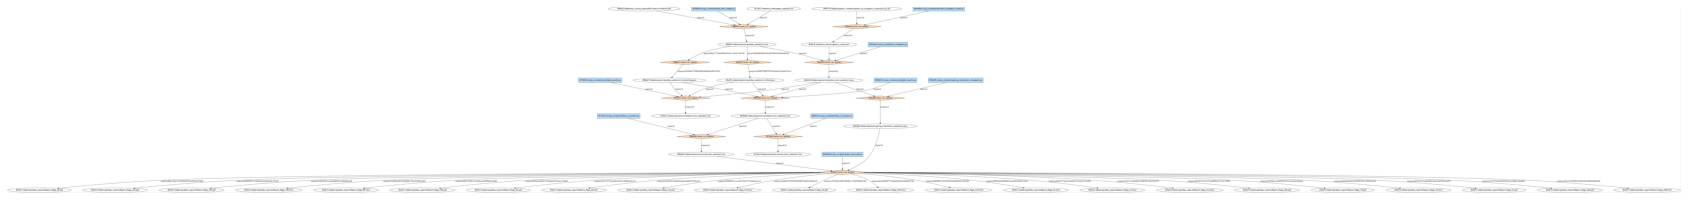

In [20]:
im = pilim.open("/tmp/lineage1.jpg")

fig,ax = plt.subplots(1,1, figsize = (30,15))
ax.imshow(im)
ax.axis("off");

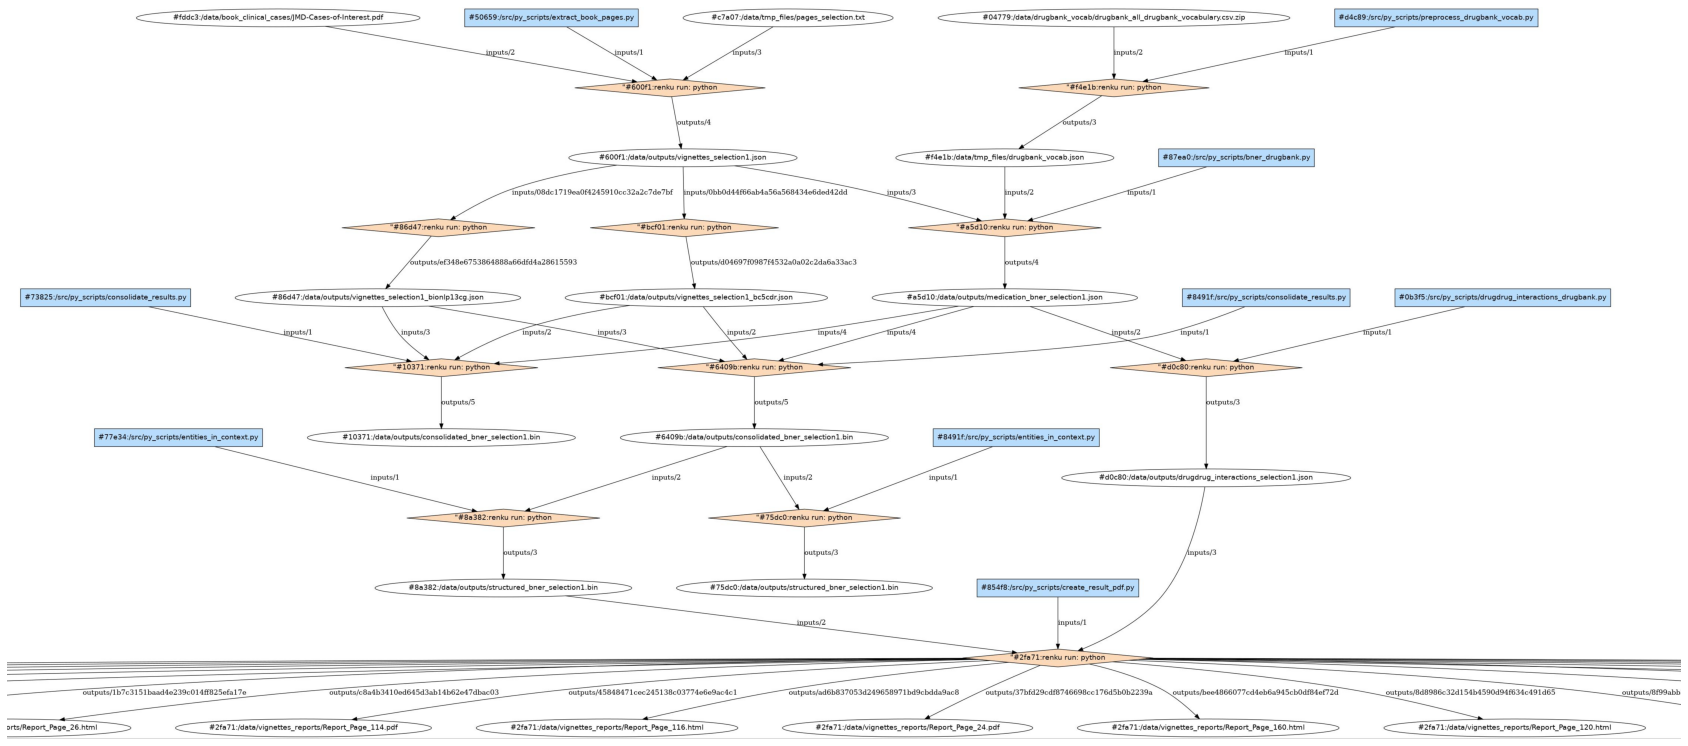

In [22]:
#zoom into a part of it

fig,ax = plt.subplots(1,1, figsize = (30,15))
ax.imshow(im)
ax.set_xlim(6000, 10500)
ax.axis("off");

**Notes / Observations:**

The edges of the diagram contain 2 types of labels:

- "inputs/1", "inputs/2", "outputs/1", etc
   * when renku automatically detected inputs and outputs provided as arguments to the python script in cli,
   * when we explicitly specified inputs/outputs (with ` --no-output-detection --output`)
- "inputs/0bb0d44f66ab4a56a568434e6ded42dd", etc
   * when we used renku-python package in the script to create Input, Output and Parameter objects
   * when we used .renku/tmp/output.txt to provide on separate lines the paths to the output files to record as outputs
   
In the case when renku-python package was used in the Python script, we see that the graph lacks the node for the script (more precisely "src/py_scripts/bner_scispacy.py")

----------------

# Appendices

### Appendix 1

In [9]:
!renku log


*    75dc00e1 (latest -> 8a382741) ../data/outputs/structured_bner_selection1.bin
|\
+---*  75dc00e1 (latest -> 55263ed9) ../.renku/workflow/3cb740464d9c4519aba76f395568b861_python.yaml
| |/
| | *    2fa7166e ../data/vignettes_reports/Report_Page_208.html
| | |\
| | | \
| | | |\
| | +-+---*  2fa7166e ../data/vignettes_reports/Report_Page_208.pdf
| | | | |/
| | +-+---*  2fa7166e ../data/vignettes_reports/Report_Page_120.pdf
| | | | |/
| | +-+---*  2fa7166e ../data/vignettes_reports/Report_Page_60.pdf
| | | | |/
| | +-+---*  2fa7166e ../data/vignettes_reports/Report_Page_114.html
| | | | |/
| | +-+---*  2fa7166e ../data/vignettes_reports/Report_Page_24.pdf
| | | | |/
| | +-+---*  2fa7166e ../data/vignettes_reports/Report_Page_76.pdf
| | | | |/
| | +-+---*  2fa7166e ../data/vignettes_reports/Report_Page_114.pdf
| | | | |/
| | +-+---*  2fa7166e ../data/vignettes_reports/Report_Page_14.html
| | | | |/
| | +-+---*  2fa7166e ../data/vignettes_reports/Report_Page_140.pdf
| | | | |/
| | +-+---

---------------------

### Appendix 2

In [23]:
!cat /tmp/lineage1.dot

digraph { 
 node [ fontname="DejaVu Sans" ] ; 
 	"a5d10:/data/outputs/medication_bner_selection1.json" -> "10371:" [label="inputs/4"] 
	"86d47:/data/outputs/vignettes_selection1_bionlp13cg.json" -> "10371:" [label="inputs/3"] 
	"bcf01:/data/outputs/vignettes_selection1_bc5cdr.json" -> "10371:" [label="inputs/2"] 
	"73825:/src/py_scripts/consolidate_results.py" -> "10371:" [label="inputs/1"] 
	"6409b:/data/outputs/consolidated_bner_selection1.bin" -> "8a382:" [label="inputs/2"] 
	"77e34:/src/py_scripts/entities_in_context.py" -> "8a382:" [label="inputs/1"] 
	"600f1:/data/outputs/vignettes_selection1.json" -> "a5d10:" [label="inputs/3"] 
	"87ea0:/src/py_scripts/bner_drugbank.py" -> "a5d10:" [label="inputs/1"] 
	"f4e1b:/data/tmp_files/drugbank_vocab.json" -> "a5d10:" [label="inputs/2"] 
	"8a382:/data/outputs/structured_bner_selection1.bin" -> "2fa71:" [label="inputs/2"] 
	"d0c80:/data/outputs/drugdrug_interactions_selection1.json" -> "2fa71:" [label="inputs/3"] 
	"854f8:/src/py_scripts/cr